In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import svm

In [11]:
mnist_path="../mnist_data/"

In [12]:
def load_mnist(path):
    #path:mnist data path
    mnist=fetch_openml('mnist_784',data_home=path)
    image=mnist['data']#shape:(70000,784)
    image=image/255
    label=mnist['target']#shape:(70000,)
    return image,label

In [13]:
svc=svm.SVC()
image,label=load_mnist(mnist_path)
train_image=image[:60000,:]
test_image=image[60000:,:]
train_label=label[:60000]
test_label=label[60000:]
svc.fit(train_image,train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
predict_label=svc.predict(test_image)

In [15]:
result_matrix=np.zeros((10,10))
for i in range(len(predict_label)):
    x=int(test_label[i])-1
    y=int(predict_label[i])-1
    result_matrix[x,y]=result_matrix[x,y]+1

0.9792


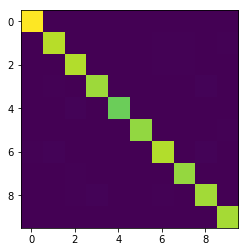

In [16]:
plt.imshow(result_matrix/10000)
print(svc.score(test_image,test_label))

In [21]:
precision=np.zeros(10)
recall=np.zeros(10)
for i in range(10):
    precision[i]=result_matrix[i,i]/sum(result_matrix[:,i])
    recall[i]=result_matrix[i,i]/sum(result_matrix[i,:])
print(precision)
print(recall)

[0.98858648 0.9757517  0.97453477 0.98261759 0.98640997 0.98538622
 0.9755142  0.97137014 0.97194389 0.97985901]
[0.99207048 0.9748062  0.98514851 0.97861507 0.9764574  0.98538622
 0.9688716  0.97535934 0.96134787 0.99285714]
